In [1]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from functions1 import *

def surface_plot(surface,title):
    M,N = surface.shape

    ax_rows = np.arange(M)
    ax_cols = np.arange(N)

    [X,Y] = np.meshgrid(ax_cols, ax_rows)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y,surface,cmap=cm.viridis,linewidth=0)
    plt.title(title)

if __name__ == '__main__':

    # Load the terrain
    terrain1 = imread('SRTM_data_Norway_1.tif')

    #terrain2 = imread('SRTM_data_Norway_2.tif')

    # Show the terrain
    plt.figure()
    plt.title('Terrain over Norway 1')
    plt.imshow(terrain1, cmap='gray')
    plt.xlabel('X')
    plt.ylabel('Y')

    surface_plot(terrain1,'Surface plot over Norway 1')

    plt.show()

    # Extract a smaller patch of the terrain
    row_start = 1950
    row_end = 2050

    col_start = 1200
    col_end = 1450

    terrain1_patch = terrain1[row_start:row_end, col_start:col_end]

    surface_plot(terrain1_patch,'Surface plot ovar a patch of Norway 1')

    plt.show()

    # Perform a OLS fitting using the whole axis pf the terrain data
    num_rows, num_cols = terrain1_patch.shape

    rows = np.arange(num_rows)
    cols = np.arange(num_cols)

    [C,R] = np.meshgrid(cols,rows)

    x = C.reshape(-1,1)
    y = R.reshape(-1,1)
    z = terrain1_patch.flatten()

    data = np.c_[np.ones((num_rows*num_cols,1)), x, y, x**2, x*y, y**2, \
                x**3, x**2*y, x*y**2, y**3, \
                x**4, x**3*y, x**2*y**2, x*y**3,y**4, \
                x**5, x**4*y, x**3*y**2, x**2*y**3,x*y**4, y**5]

    beta_ls = np.linalg.inv(data.T @ data) @ data.T @ z

    fitted_terrain = np.zeros((num_rows, num_cols))
    for i in range(num_rows):
        y_ = rows[i]
        for j in range(num_cols):
            x_ = cols[j]

            data_vec = np.array([1, x_, y_, x_**2, x_*y_, y_**2, \
                                x_**3, x_**2*y_, x_*y_**2, y_**3, \
                                x_**4, x_**3*y_, x_**2*y_**2, x_*y_**3,y_**4, \
                                x_**5, x_**4*y_, x_**3*y_**2, x_**2*y_**3,x_*y_**4,y_**5])
            fitted_terrain[i,j] = data_vec @ beta_ls

    surface_plot(fitted_terrain,'Fitted terrain surface')

    plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
xVector=x
yVector=y
zVector=z
#matrixSizey=np.size(y1,1)
#matrixSizex=np.size(x1,0)

In [3]:
#Preparation for k-folds CV
sizeVector=np.size(zVector)
indeces=np.linspace(0,sizeVector-1,sizeVector)
indeces=indeces.astype(int)
numberOfFolds=10
folds = k_folds_CV(indeces, numberOfFolds)

In [4]:
polynom_oders=[2,3,4,5]
zPredictmatrix,statsMatrix,betaMatrix=olsModel(polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces)

STATS of MSE for polynom order 2 is:
DescribeResult(nobs=10, minmax=(8441.21520819037, 9558.46411718528), mean=9017.484886420172, variance=89879.6682103255, skewness=-0.15730294156633284, kurtosis=0.16128723266302725)
STATS of R2score for polynom order 2 is:
DescribeResult(nobs=10, minmax=(0.7471347218698003, 0.7753645797802129), mean=0.7618829330946009, variance=6.290170410149344e-05, skewness=-0.08351816388994893, kurtosis=-0.27181632841981695)


STATS of MSE for polynom order 3 is:
DescribeResult(nobs=10, minmax=(6149.736224926964, 6794.424464392519), mean=6450.485904311281, variance=35425.4730149537, skewness=0.12511649619981077, kurtosis=-0.49365903044811965)
STATS of R2score for polynom order 3 is:
DescribeResult(nobs=10, minmax=(0.8227795150172361, 0.8382184079704138), mean=0.8296701956436875, variance=2.4392566380550332e-05, skewness=0.3778134346089073, kurtosis=-0.995073182207606)


STATS of MSE for polynom order 4 is:
DescribeResult(nobs=10, minmax=(3115.076426355567, 3465.03

In [ ]:
print(beta_ls)

In [ ]:
print(data_vec)

In [ ]:
print(data_vec @ beta_ls)

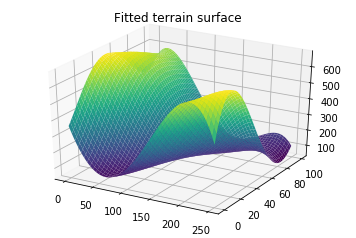

In [7]:
fitted_terrain2 = data @ beta_ls
fitted_terrain2 = fitted_terrain2.reshape(100,250)
surface_plot(fitted_terrain2,'Fitted terrain surface')

In [5]:
z_predict=fitted_terrain.flatten()

In [6]:
print(MSE(z,z_predict))

2129.9059568666416


In [ ]:
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(fitted_terrain, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(fitted_terrain, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
beta1,XXinv1 =OSLregression(xVector,yVector,zVector,5)

-9.898997177515411e-15


In [ ]:
print(beta_ls)